# Machine Learning para todos! Hand-on em algoritmos de Classificação.

### **Rafael Adnet**   --   rafaadnet@gmail.com.br  --  https://www.linkedin.com/in/radnet/


------------

# 1 - Introdução

## 1.1 - O que é Machine Learning (ML)?

> _Campo de estudo que dá aos computadores a habilidade de aprender sem serem explicitamente programados_ (Arthur Samuel)


## 1.2 - Famílias de algoritmos

Os algoritmos de ML são organizados nas seguintes famílias:

![ml-algs](https://i.imgur.com/mZdJLdg.png)

<p class="importante">Supervisionado X Não-supervisionado:<br>
O **supervisionado** trabalha com um atributo alvo para estimar (Todos os registros são rotulados). <br>O **não-supervisionado**, como não tem atributo alvo, trabalha em como relacionar os dados entre si. </p>

<p class="exercicio"> Exercício </p>

Qual tipo de algoritmo de ML pode ser usado para resolver os problemas abaixo?
- Trajetória de um robô em um ambiente desconhecido
- Agrupar imagens de objetos semelhantes
- Encontrar as imagens de gatos entre várias fotos de animais
- Estimar se um cliente será inadimplente a partir das informações de outros clientes.
- Estimar o preço de uma casa a partir de suas características e de outras casas a venda.
- Determinar fraude em uma transação bancária

## 1.2.1 - Aprendizado Supervisionado



Classificação x Regressão:

Regressão: Quando o objetivo é estimar um valor contínuo. (Ex.: Estimar altura, valor, peso ...)

Classicação: Quando o objetivo é estimar uma classe. (Ex.: Estimar se um cliente vai ou não aderir um plano; **Estimar se uma pessoa vai ou não sobreviver ao Titanic**)<br>
Obs.: a classificação não precisa ocorrer necessáriamente apenas em duas classes. Desde que haja um conjunto finito de classes, o problema pode ser visto como um problema de classigicação. 

# 2 - Random Forest
 
 Random forest é um algoritmos de aprendizado supervisionado. A idéia dele é criar um conjunto de **árvores de decisão** para classificar os registros
 
## 2.1 - Decision Tree

É um modelo de classificação formado por uma série de "regras" aplicadas aos atributos dos dados. 

    Exemplo: Árvore de decisão para um jogo de tênis
![decision_tree](http://web.tecnico.ulisboa.pt/ana.freitas/bioinformatics.ath.cx/bioinformatics.ath.cx/uploads/RTEmagicC_arv_dec4_01.gif.gif)

   * Vermelho: Nós internos que representam os atributos
   * Azul: Ramos que representam os possíveis valores assumidos pelo nós pai
   * Verde: Folhas que representa a classe resultando 
   
  
### Decision Tree - Algoritmo

Como montar uma árvore de decisão?

Exemplo: Grupo de clientes com características fictícias. 
Vamos encontrar uma árvore que defina as regras do _churn_ (abandonar a empresa) ?

**Qual das características melhor divide o conjunto quano a ocorrência ou não de _churn_?**

Vamos carregar o dataset baseado nessa imagem:

<span class="importante">https://bit.ly/2MovdOo</span>

In [1]:
#from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("https://bit.ly/2MovdOo")
df

,head,body,color,churn
0,square,rectangular,white,1
1,square,rectangular,white,1
2,square,rectangular,white,1
3,circle,circle,black,1
4,square,circle,white,0
5,circle,circle,white,1
6,square,rectangular,white,1
7,square,rectangular,white,1
8,circle,rectangular,black,0
9,square,circle,white,0


Vamos agora transformar os atributos de valores categóricos em numéricos.

 *Dica: usamos o get_dummies do Pandas*

In [5]:
df_dmy = pd.get_dummies(df,columns=['body', 'head', 'color'], drop_first=True)
df_dmy

,churn,body_rectangular,head_square,color_white
0,1,1,1,1
1,1,1,1,1
2,1,1,1,1
3,1,0,0,0
4,0,0,1,1
5,1,0,0,1
6,1,1,1,1
7,1,1,1,1
8,0,1,0,0
9,0,0,1,1


A cada iteração da Decision Tree ela busca o atributo que **melhor divide** os dados, ou seja, os subconjuntos gerados pela divisão a partir deste atributo são pouco **"bagunçados"** (Tem mais repetições de uma certa classe)

#### Entropia
é uma maneira de medir a desordem de um conjunto. O valor varia de 0 à 1, onde 0 representa completamente ordenado (todos os componentes do conjunto são da mesma classe) e 1 completamente desordenado (no conjunto há quantidade iguais de todas as classes). 

<p hidden>
Seja $S$ o conjunto, e $P_i$ a probabilidade de ocorrer a classe $i$ dentro do conjunto, a entropia é medida como:
$Entropy(S)=-\sum{P_i log_2{P_i}}$
</p>


In [6]:
df_dmy_hs_one = df_dmy[df_dmy["head_square"]==1]
df_dmy_hs_zero = df_dmy[df_dmy["head_square"]==0]

print("head_square = 1")
print(df_dmy_hs_one.groupby("churn").size())
print("\n\n")

print("head_square = 0")
print(df_dmy_hs_zero.groupby("churn").size())

head_square = 1
churn
0    4
1    5
dtype: int64



head_square = 0
churn
0    1
1    2
dtype: int64



O grupo de `head_square = 1` não parece me ajudar a definir se o churn vai acontecer ou não

<p class = "exercicio"> Exercício </p>
Fazer a mesma análise para o atributo *body_rectangular*

A divisão pareceu melhor ou pior?

Os conjuntos resultantes parecem estar mais ordenados (com menor Entropia)?

In [7]:
df_dmy_hs_one =  df_dmy[df_dmy["body_rectangular"]==1]
df_dmy_hs_zero =  df_dmy[df_dmy["body_rectangular"]==0]

print("body_rectangular = 1")
print(df_dmy_hs_one.groupby("churn").size())
print("\n\n")

print("body_rectangular = 0")
print(df_dmy_hs_zero.groupby("churn").size())

body_rectangular = 1
churn
0    1
1    5
dtype: int64



body_rectangular = 0
churn
0    4
1    2
dtype: int64


.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.

<p class ="importante"> O Algoritmo de decision tree repete esse processo de encontrar o melhor atributo para dividir o conjunto, até que os atributos acabem ou o resultado esteja totalmente ordenado (só tenha um valor na variável alvo)!</p>

**Vamos fazer nossa árvore de decisão completa agora!**

In [8]:
from sklearn import tree

In [9]:
tree.DecisionTreeClassifier?

In [10]:
X = df_dmy[['body_rectangular', 'head_square', 'color_white']] 
Y = df_dmy['churn']
clf = tree.DecisionTreeClassifier()

# Uma linha de código e já teinamos a árvore
clf = clf.fit(X, Y)

In [11]:
from graphviz import Digraph
from graphviz import Source
def plot_tree(clf_tree,X_dataset):
    with open('tree.dot','w') as td:
        g = tree.export_graphviz(clf_tree, 
                                 out_file=td,
                                 feature_names=X_dataset.columns,
                                 class_names=["N","S"],
                                 filled=True,
                                 rounded=True)
        

    with open('tree.dot','r') as td:
        src = Source(td.read())

    return src
    
    

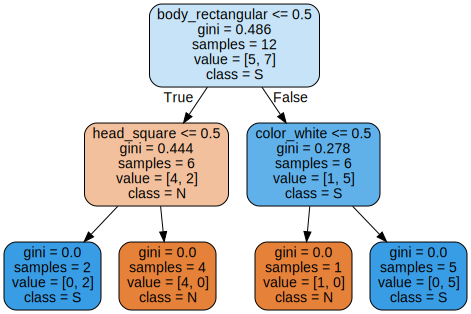

In [12]:
plot_tree(clf,X)

<p class = "atencao"> Diferente do exemplo, uma arvore de decisão raramente vai encontrar as regras que dividem perfeitamente seu dataset! </p>

**Vamos ao Titanic!**
<p class = "importante">https://bit.ly/2wbQoZ3</p>

In [13]:
titanic_dmy  = pd.read_csv("https://bit.ly/2wbQoZ3")
titanic_dmy.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FaixaDeIdade,Sobrenome,male,C,Q,S
0,0,3,male,22.0,1,0,7.2500,S,adulto,Braund,1,0,0,1
1,1,1,female,38.0,1,0,71.2833,C,adulto,Cumings,0,1,0,0
2,1,3,female,26.0,0,0,7.9250,S,adulto,Heikkinen,0,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,adulto,Futrelle,0,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,adulto,Allen,1,0,0,1


Vamos primeiro renomear as colunas C,Q e S para que façam mais sentido:

In [14]:
titanic_dmy_renamed = titanic_dmy.rename(columns={"C":"Embarked_C",
                                                  "Q":"Embarked_Q",
                                                  "S":"Embarked_S",
                                                 "Sex_male":"male"})
titanic_dmy_renamed.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FaixaDeIdade,Sobrenome,male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,male,22.0,1,0,7.2500,S,adulto,Braund,1,0,0,1
1,1,1,female,38.0,1,0,71.2833,C,adulto,Cumings,0,1,0,0
2,1,3,female,26.0,0,0,7.9250,S,adulto,Heikkinen,0,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,adulto,Futrelle,0,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,adulto,Allen,1,0,0,1


Vamos fazer agora o get_dummies do atributo `FaixaDeIdade`

In [15]:
titanic_fdi_dmy = pd.get_dummies(titanic_dmy_renamed,columns=["FaixaDeIdade"])
titanic_fdi_dmy.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sobrenome,male,Embarked_C,Embarked_Q,Embarked_S,FaixaDeIdade_adolescente,FaixaDeIdade_adulto,FaixaDeIdade_criança,FaixaDeIdade_idoso
0,0,3,male,22.0,1,0,7.2500,S,Braund,1,0,0,1,0,1,0,0
1,1,1,female,38.0,1,0,71.2833,C,Cumings,0,1,0,0,0,1,0,0
2,1,3,female,26.0,0,0,7.9250,S,Heikkinen,0,0,0,1,0,1,0,0
3,1,1,female,35.0,1,0,53.1000,S,Futrelle,0,0,0,1,0,1,0,0
4,0,3,male,35.0,0,0,8.0500,S,Allen,1,0,0,1,0,1,0,0


Não é um bom padrão usar caracteres especiais como nome das colunas. Por isso iremos renomear a coluna FaixaDeIdade_criança -> FaixaDeIdade_crianca.

In [16]:
titanic_fdi_dmy_renamed = titanic_fdi_dmy.rename(columns=
                                                 {"FaixaDeIdade_criança":"FaixaDeIdade_crianca"
                                                 })
titanic_fdi_dmy_renamed.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sobrenome,male,Embarked_C,Embarked_Q,Embarked_S,FaixaDeIdade_adolescente,FaixaDeIdade_adulto,FaixaDeIdade_crianca,FaixaDeIdade_idoso
0,0,3,male,22.0,1,0,7.2500,S,Braund,1,0,0,1,0,1,0,0
1,1,1,female,38.0,1,0,71.2833,C,Cumings,0,1,0,0,0,1,0,0
2,1,3,female,26.0,0,0,7.9250,S,Heikkinen,0,0,0,1,0,1,0,0
3,1,1,female,35.0,1,0,53.1000,S,Futrelle,0,0,0,1,0,1,0,0
4,0,3,male,35.0,0,0,8.0500,S,Allen,1,0,0,1,0,1,0,0


Por fim, antes de realmente processar, iremos retirar as colunas redundantes

In [17]:
titanic_final = titanic_fdi_dmy_renamed.drop(["Embarked","Sex"],axis=1)
titanic_final.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sobrenome,male,Embarked_C,Embarked_Q,Embarked_S,FaixaDeIdade_adolescente,FaixaDeIdade_adulto,FaixaDeIdade_crianca,FaixaDeIdade_idoso
0,0,3,22.0,1,0,7.2500,Braund,1,0,0,1,0,1,0,0
1,1,1,38.0,1,0,71.2833,Cumings,0,1,0,0,0,1,0,0
2,1,3,26.0,0,0,7.9250,Heikkinen,0,0,0,1,0,1,0,0
3,1,1,35.0,1,0,53.1000,Futrelle,0,0,0,1,0,1,0,0
4,0,3,35.0,0,0,8.0500,Allen,1,0,0,1,0,1,0,0


Vamos olhar para a correlação dos dados agora. 

<p class="exercicio"> Exercício</p>
Faça agora a correlação entre os dados numéricos e escolha 3 atributos para montar sua árvore de decisão

In [18]:
titanic_final.corr()["Survived"].sort_values()

male                       -0.541585
Pclass                     -0.335549
Embarked_S                 -0.151777
Age                        -0.077510
FaixaDeIdade_adulto        -0.068519
SibSp                      -0.034040
FaixaDeIdade_idoso         -0.018500
Embarked_Q                  0.004536
FaixaDeIdade_adolescente    0.027616
Parch                       0.083151
FaixaDeIdade_crianca        0.121097
Embarked_C                  0.169966
Fare                        0.255290
Survived                    1.000000
Name: Survived, dtype: float64

Como já foi comentado, é interessante olharmos para a correlação absoluta (desconsiderando o sinal de menos). Assim eu decidi escolher os atributos `male`,`Pclass` e `Fare`.

1. Diferente do exemplo anterior,<span class="importante"> não iremos criar a árvore baseada em todos os dados</span>.

2. Para termos dados para medir a perfórmace do algoritmo, iremos separar os dados em **treinamento(x_treino,y_treino)** e **teste (x_teste,y_teste)**!

In [27]:
from sklearn.model_selection import train_test_split

X = titanic_final[["Embarked_S","Pclass","male"]]
y = titanic_final["Survived"]

x_treino, x_teste,y_treino, y_teste = train_test_split(X,
                                                       y,
                                                       test_size = .3,
                                                       random_state=25)

<p class="exercicio"> Exercício</p>
Baseado no exemplo, façam o treinamento da árvore de decisão apenas com o dados de treino

In [20]:
clf_titanic = tree.DecisionTreeClassifier()

#Uma linha de treino 
clf_titanic = clf_titanic.fit(x_treino, y_treino)

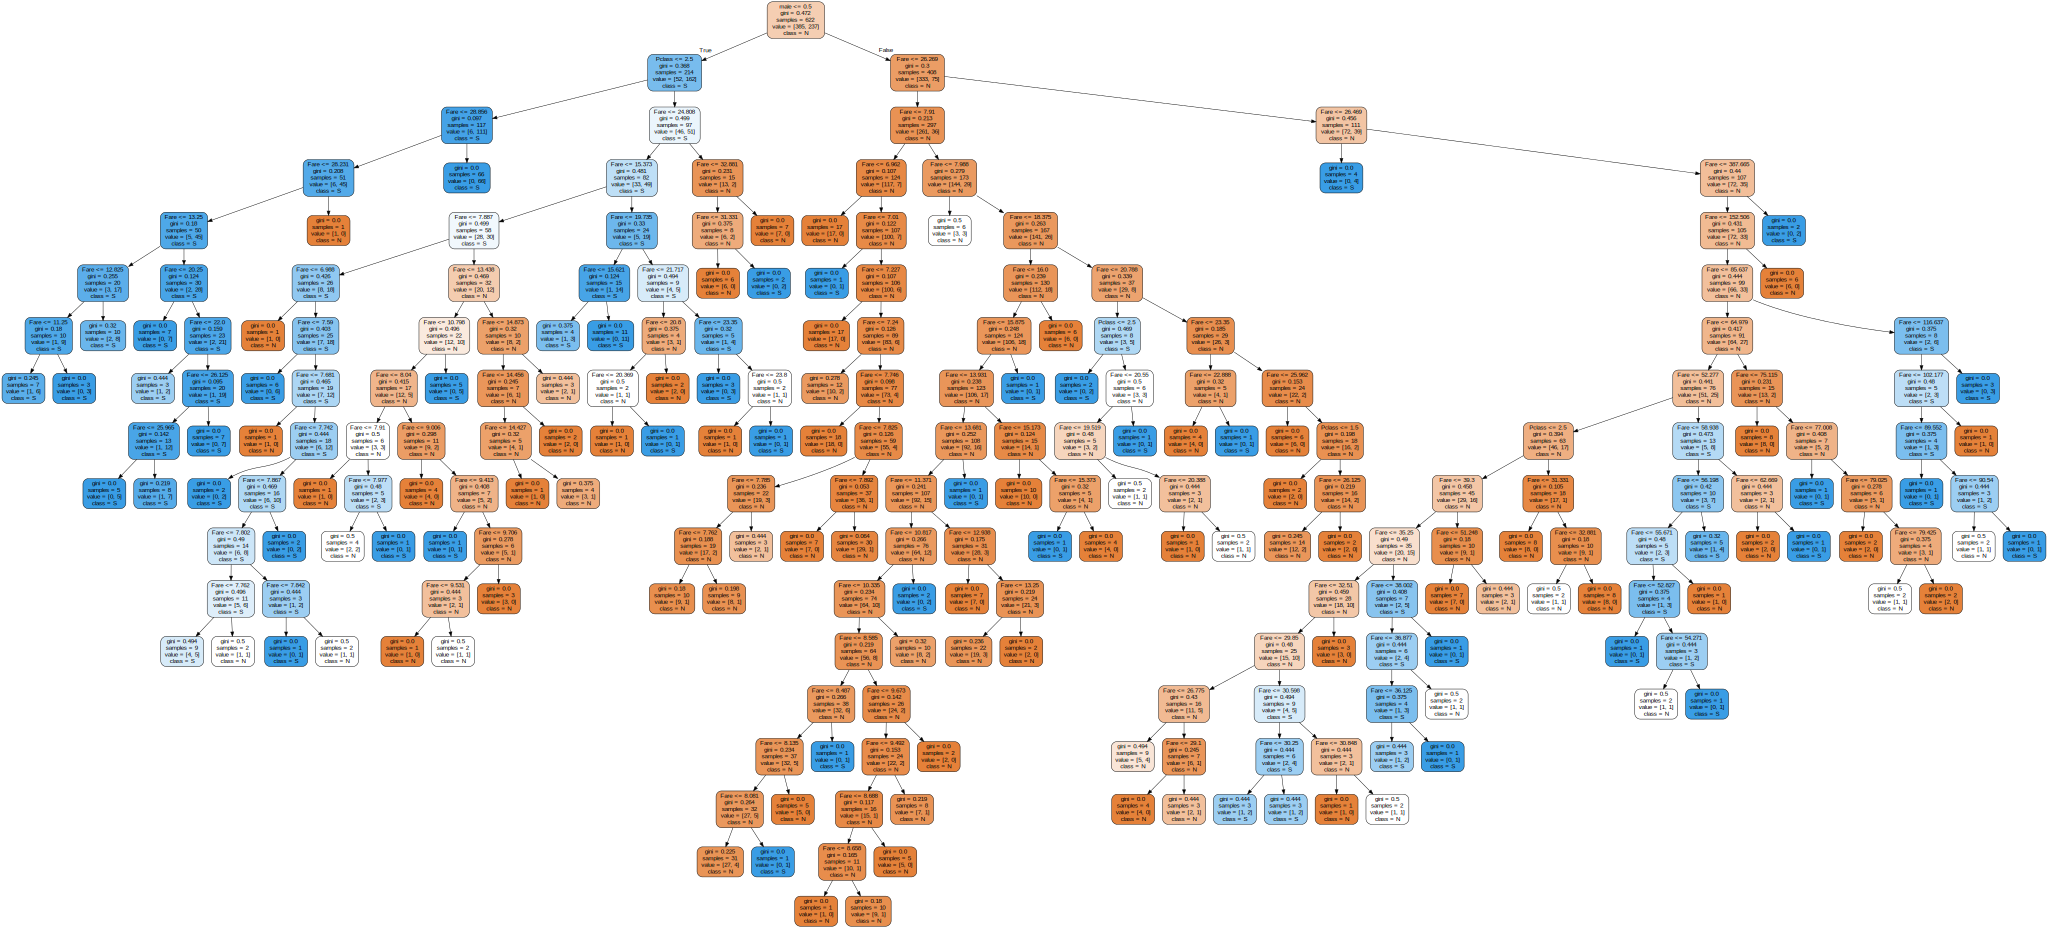

In [21]:
plot_tree(clf_titanic,x_treino)

<p class="importante"> Agora iremos avaliar o modelo!</p>

Primeiro, precisamos fazer as predições dos dados de teste

In [28]:
predict = clf_titanic.predict(x_teste)

Agora iremos ver algumas métricas de analise

## 2.2 - Métricas de análise

### Matriz confusão

![tt](https://sebastianraschka.com/images/faq/multiclass-metric/conf_mat.png)

In [29]:
from sklearn import metrics
print(metrics.confusion_matrix(y_teste,predict))

[[161   3]
 [ 55  48]]


A partir da matriz de confusão algumas taxas podem ser calculadas.

Vamos visualizar de outra maneira os dados sendo julgados
![pr](https://upload.wikimedia.org/wikipedia/commons/thumb/a/ab/Precis%C3%A3o_e_revoca%C3%A7%C3%A3o.png/262px-Precis%C3%A3o_e_revoca%C3%A7%C3%A3o.png)

Dentro do circulo estão os elementos julgados como 1 (Positivo, nesse caso, sobreviveu). Fora do circulo estão os elementos que a árvore classificou como 0 (Negativo, nesse caso, não-sobreviveu). O retangulo representa o real valor dos dados.


In [30]:
print(metrics.classification_report(y_teste, predict))

             precision    recall  f1-score   support

          0       0.75      0.98      0.85       164
          1       0.94      0.47      0.62       103

avg / total       0.82      0.78      0.76       267




### PRECISION

*Precision* representa quanto dos elementos julgados como Sobreviventes, de fato são Sobreviventes. 

Mede a taxa de acerto do classificador dentre os valores <span class="atencao">estimados</span> .

### RECALL

*Recall* representa quantos dos reais sobreviventes foram de fato classificados como sobreviventes.

Mede a taxa de acerto do classificador dentre os valores <span class="atencao">reais</span> .


**Relacionando Precision e Recall**

    Exemplo 1: Supodo que temos 100 dados. Dos 100 dados, 70 são da classe A. Foi feito um classificador que julgou 19 na classe A, dos quais 17 estavam certos. 
 
    Vamos fazer o calculo do Precision e Recall da classe A




In [25]:
real_a = 70
estimate_a = 19
estimate_right_a = 17

precision = estimate_right_a/estimate_a
print("precision: {}".format(precision))

recall = estimate_right_a/real_a
print("recall: {}".format(recall))


precision: 0.8947368421052632
recall: 0.24285714285714285


Nesse caso $precision > recall$. 

    Exemplo 2: Supodo que temos 100 dados. Dos 100 dados, 20 são da classe A. Foi feito um classificador que julgou 60 na classe A, dos quais 17 estavam certos. 
 
    Vamos fazer o calculo do Precision e Recall da classe A

In [26]:
real_a = 20
estimate_a = 60
estimate_right_a = 17

precision = estimate_right_a/estimate_a
print("precision: {}".format(precision))

recall = estimate_right_a/real_a
print("recall: {}".format(recall))

precision: 0.2833333333333333
recall: 0.85


Nesse caso $recall > precision$. 

**Qual o melhor classificador? o do Exemplo 1 ou 2?**

Podemos relacionar o *recall* e o *precision* em uma métrica!

### F1-SCORE

$F1=2\frac{precision  \times  recall}{precision+recall}$

O F1 é uma maneira de analisarmos e relacionarmos o precision e o recall.


## 2.3 - Random Forest

O algoritmo *Random Forest* esta na família dos *Ensemble Algorithms*. Ensemble Algorithms são algoritmos que usam multiplos algoritmos para obter melhor desempenho preditivo.

No caso do *Random Forest*, o algoritmo usado é o *Decision tree*, que é aplicado a várias amostras dos dados, gerando árvores diferentes.

![rf](https://cdn-images-1.medium.com/max/1600/1*rXd6aK4-_uuUaXCVZ_FX0g.png)

O modelo classifica baseado em uma contagem de votos. Quando um dado precisa ser classificado, cada árvore da um voto a classe que prediz. Por fim, a classe com mais votos é a vencedora
 ![rf2](https://d2wh20haedxe3f.cloudfront.net/sites/default/files/styles/large/public/random_forest_diagram_0.png?itok=7vXTw5yz)


**Vamos agora criar e treinar nossa modelo !**

In [32]:
from sklearn.ensemble import RandomForestClassifier

rf_titanic = RandomForestClassifier(random_state=42)


rf_titanic = rf_titanic.fit(x_treino, y_treino)

Diferente da Decision Tree, agora não temos aprenas uma árvore de decisão, mas sim uma lista de árvores. Vamos visualizar a primeira árvore dessa lista!

In [33]:
type(rf_titanic)

sklearn.ensemble.forest.RandomForestClassifier

In [34]:
# Lista de árvores
list_trees = rf_titanic.estimators_

In [35]:
type(list_trees[0])

sklearn.tree.tree.DecisionTreeClassifier

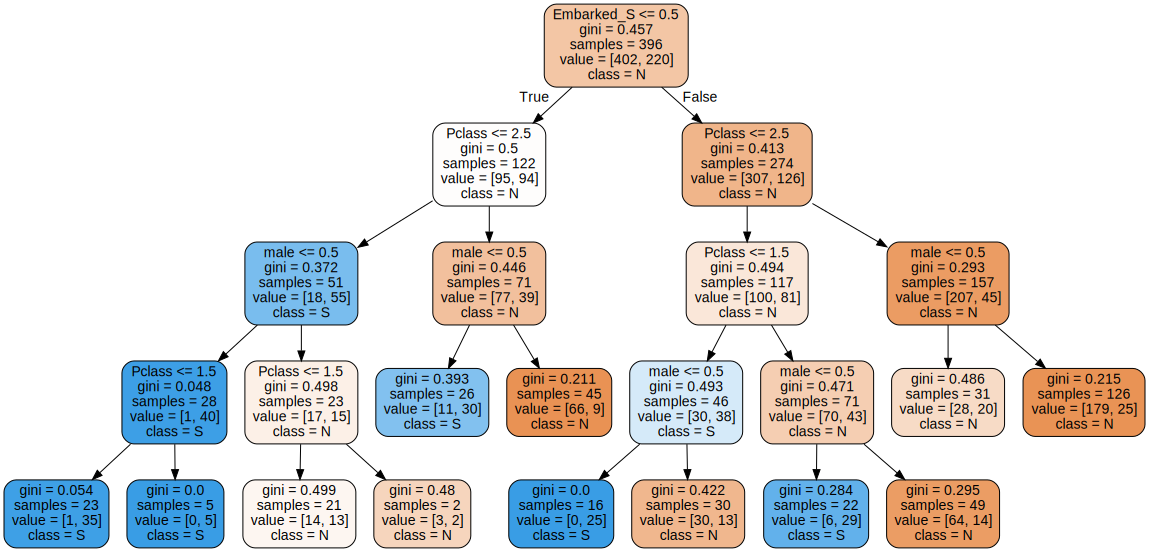

In [36]:
plot_tree(list_trees[0],x_treino)

<p class="exercicio"> Exercício </p>
Hoje já fizemos uma análise completa de um classificador, a árvore de decisão. Agora vamos fazer o mesmo para outro classificador, o RandomForest!

In [37]:
predict = rf_titanic.predict(x_teste)
print(metrics.confusion_matrix(y_teste,predict))

[[158   6]
 [ 44  59]]


In [38]:
print(metrics.classification_report(y_teste, predict))

             precision    recall  f1-score   support

          0       0.78      0.96      0.86       164
          1       0.91      0.57      0.70       103

avg / total       0.83      0.81      0.80       267



### Métrica para análise de Random Forest

Existe uma métrica que, diferente das mostradas até agora, não se aplica a todo classificador. A meetrica OOB SCORE é uma métrica específica do algoritmo Random Forest.

#### OOB (Out-Of-Bag) SCORE

Cada árvore da Random Forest é gerada a partir de uma amostra de dados. Então, para cada árvore, existem dados que não foram usados em sua construção. Esses são os dados **Out-of-Bag**. O OOB Score analisa o quanto uma árvore acerta dos dados Out-Of-Bag dela. Por fim ele faz uma média de todas as árvores e vê a média de acerto das árvores. 

A vantagem o OOB Score na analise da Random Forest é que não é necessário apresentar dados de teste para obter esse score. Além disso, ele pode ser calculado enquanto o modelo é construido.

O **OOB Score** estima a precisão do modelo. Ele varia entre 0 e 1, onde é 0 caso todas as árvores errem todas as classificações dos registros Out-Of-Bag, e 1 caso acertem todos os registros. Então, quanto maior o **OOB Score** melhor o modelo. 


Um parâmetro importante do algoritmo *Random Forest* é a quantidade de árvores que ele ira criar. 


<p class = "importante"> Agora iremos otimizar esse parâmetro a partir do **OOB Score**! <br> Será que quanto mais árvores melhor o classificador?</p>
Abaixo iremos ver a variação do erro do OOB em função da quantidade de árvores. 



In [39]:
oob =[]
n_estimators = list(range (2,60))
for i in n_estimators:
    rf_titanic =RandomForestClassifier(oob_score=True, n_estimators=i, random_state=42)
    rf_titanic = rf_titanic.fit(x_treino, y_treino)
    oob.append(rf_titanic.oob_score_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably me

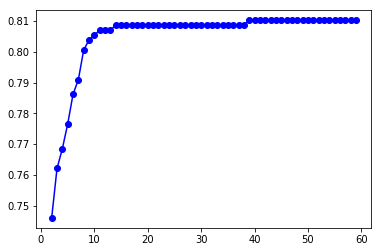

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(n_estimators,oob,'o-b')

Agora, vamos pegar o modelo de melhor **OOB Score**.

In [41]:
max_oob = max(oob)
index_max_oob = oob.index(max_oob)
estimators = n_estimators[index_max_oob]

print("""OOB Score: {}
Estimators: {} """.format(max_oob,estimators))

OOB Score: 0.8102893890675241
Estimators: 39 


In [42]:
rf_titanic_2 =RandomForestClassifier( n_estimators=estimators, random_state=42)
rf_titanic_2 = rf_titanic_2.fit(x_treino, y_treino)


Vamos agora ver as métricas desse modelo

In [43]:
predict = rf_titanic_2.predict(x_teste)
print(metrics.confusion_matrix(y_teste,predict))

[[158   6]
 [ 44  59]]


In [44]:
print(metrics.classification_report(y_teste, predict))

             precision    recall  f1-score   support

          0       0.78      0.96      0.86       164
          1       0.91      0.57      0.70       103

avg / total       0.83      0.81      0.80       267



Acabamos de usar o  **OOB Score** para otimizar um parâmetro. Assim não usamos nosso dataset de teste e ainda conseguimos estimar um melhor valor para uma parâmetro do algoritmo. 

Infelizmente o **OOB Score** é exclusivo do algoritmo *Random Forest*, entretanto existe uma tecnica chamada *Cross Validation* que pode ser aplicada de maneira semelhante em qualquer algoritmo =).


## 2.4 - Cross Validation
A *Cross Validation*, ou validação cruzada, é um tecnica usada para estimar a precisão de um modelo. 

A tecnica de *Cross Validation* pode ser usada para otimização de parâmetros de um algoritmo. 

![cv](https://cdn-images-1.medium.com/max/1600/1*J2B_bcbd1-s1kpWOu_FZrg.png)

In [45]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(rf_titanic_2, x_treino, y_treino, cv=10)
mean_accuracy = sum(accuracy)/len(accuracy)

print("""Scores:{}
Mean:{}""".format(accuracy,mean_accuracy))

Scores:[0.84126984 0.82539683 0.77777778 0.79365079 0.82539683 0.80645161
 0.77419355 0.85245902 0.83606557 0.7704918 ]
Mean:0.810315361822501


<p class="exercicio"> Exercício </p>
Vamos fazer agora a otimização da quantidade de árvores da *Random Forest* usando **cross validation** invés do OOB Score!

obs.: Não se esqueça de fixar o random_state

In [46]:
acc =[]
n_estimators = list(range (2,60))
for i in n_estimators:
    rf_titanic =RandomForestClassifier(n_estimators=i, random_state=42)
    rf_acc = cross_val_score(rf_titanic, x_treino, y_treino, cv=20)
    acc.append(sum(rf_acc)/len(rf_acc))

In [ ]:
plt.plot(n_estimators,acc,'o-b')

Da mesma maneira que fizemos com o **OOB Score** vamos ver qual o maximo de acuracia

In [ ]:
max_acc = max(acc)
index_max_acc = acc.index(max_acc)
estimators = n_estimators[index_max_acc]

print("""Accuracy: {}
Estimators: {} """.format(max_acc,estimators))

In [ ]:
rf_titanic3 =RandomForestClassifier(n_estimators=estimators, random_state=42)
rf_titanic3 = rf_titanic3.fit(x_treino, y_treino)

In [ ]:
predict = rf_titanic3.predict(x_teste)
print(metrics.confusion_matrix(y_teste,predict))

In [ ]:
print(metrics.classification_report(y_teste, predict))

![cv](https://3.bp.blogspot.com/-3o66FY0sxww/V1K73uQaskI/AAAAAAAAQZI/KkegqDYpz7QkZzBCW9oetqNgEW-klFrHgCLcB/s1600/folks.jpg)

.
.
.
.
.
.
.
.
.
.

----
# Submetendo para o Kaggle

<p class="importante"> https://www.kaggle.com/c/titanic </p>

Podemos ver que no kaggle o dataset desse desafio esta separado em treino e teste! O teste é o dataset que iremos estimar os resultados!

<span class="atencao">Para realizarmos as predições é importante realizar as etapas de pre-processamento no dataset de teste! </span>

Obs.: nesse caso será dado o dataset de teste já pre-processado

<p class="importante"> http://bit.ly/2GLMfzG </p>

In [ ]:
titanic_test = pd.read_csv("http://bit.ly/2GLMfzG")

O dataset de teste tem que possuir as mesma colunas usadas no treinamento!

In [ ]:
X = titanic_test[["Fare","Pclass","male"]]

Não podemos ter dados para teste nulos também.

In [ ]:
X.isnull().sum()

Como temos dados nulos, temos que preencher de alguma maneira!

In [ ]:
X_fillna = X.fillna(titanic_final["Fare"].mean()).copy()
X_fillna.isnull().sum()

Com o campo nulo preenchido, podemos fazer a predição

In [ ]:
predict = rf_titanic3.predict(X_fillna)
predict

O documento de predição tem que seguir o modelo mostrado na página do desafio no Kaggle, ou seja, o Id so passageiro e a prediçao.

Para isso precisamos inicialmente que o `predict` seja uma Série

In [ ]:
predict_serie = pd.Series(predict)
predict_serie.name = "Survived"

Em seguida devemos fazer o concat

In [ ]:
result = pd.concat([predict_serie,X_fillna, titanic_test],axis=1)
result.head()

Vamos selecionar as colunas que foram pedidas no arquivo final

In [ ]:
result_final = result[["PassengerId","Survived"]]
result_final.head()

In [ ]:
result_final.to_csv("titanic_to_submit.csv",index=False)

Por fim, vamos baixar o arquivo `titanic_to_submit.csv` e submeter no Kaggle!

<p class="exercicio"> Exercício </p>
Vamos melhorar agora nossa posição no Kaggle \o/